## Лабораторная работа 1. Знакомство с основными библиотеками и понятиями анализа данных

Постарайтесь оформить всю работу как один монолитный рассказ/отчет. Избегайте дублирования кода. Избегайте использования циклов, вместо этого ищите готовый алгоритм в пакетах. Подписывайте все графики, а также их оси, если график содержит несколько кривых, то обязательно пользуйтесь легендой. Также неукоснительно соблюдайте PEP8. За несоблюдение этих простейших правил итоговые баллы могут быть снижены безапелляционно.

### 1. (6 баллов) Знакомство с пакетом NumPy

![](http://static.wixstatic.com/media/7b913d_7d27b1ff5fe54cc79c80d2cc0e319d92~mv2.jpg)

Во всех заданиях данного раздела запрещено пользоваться циклами, а также использовать *builtin* функции *map*, *filter*, *zip*. Таким образом все функции в заданиях должны быть реализованы средствами самого пакета *numpy*. Для каждого задания привидите примеры использования реализованных функций. Предварительно полезно "по диагонали" ознакомиться с [документацией пакета](https://docs.scipy.org/doc/numpy-1.13.0/reference/), и детально с классом [numpy.ndarray](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.ndarray.html).

In [1]:
import numpy as np

**1. (2 балла)** Реализуйте функцию, принимающую на вход матрицу *X* и некоторое число *v* и возвращающую ближайший к заданному числу элемент матрицы. Например, для X = np.arange(0,10).reshape((2, 5)) и v = 3.6 ответом будет 4.

In [2]:
def nearest_value(X, v):
    delta = np.abs(X - v)
    row, clm = np.where(delta == delta.min())
    return X[row, clm][0]

In [3]:
assert nearest_value(np.arange(0, 10).reshape((2, 5)), 3.6) == 4
assert nearest_value(np.arange(0, 100).reshape((25, 4)), 99.9) == 99
assert nearest_value(np.arange(0, 10).reshape((2, 5)), -100) == 0
assert nearest_value(np.array([[-1, 2], [3, -2], [17, -13]]), 11) == 17

**2. (2 балла)** Реализуйте функцию, принимающую на вход матрицу *X* и возвращающую все её уникальные строки в виде матрицы.

In [4]:
def get_unique_rows(X):
    if len(X.shape) == 1:
        return X
    return np.unique(X, axis=0)

In [5]:
assert (get_unique_rows(np.array([[1, 2], [1, 2]])) == np.array([[1, 2]])).all()
assert (get_unique_rows(np.array([[1, 2], [1, 2], [3, 3]])) == np.array([[1, 2], [3, 3]])).all()
assert (get_unique_rows(np.array([1, 2, 3, 3])) == np.array([1, 2, 3, 3])).all()
assert (get_unique_rows(np.array([[1, 2, 3, 4]])) == np.array([[1, 2, 3, 4]])).all()

**3. (2 балла)** Реализуйте функцию, каторая во входной вещественной матрице *X* находит все значения *numpy.nan* и заменяет их на среднее арифметическое всех остальных элементов. В случае матрицы из одних *numpy.nan* произведите замену на нули.

In [6]:
def nans_to_mean(X):
    if np.isnan(X).all():
        X = np.zeros(X.shape)
    else:
        X[np.where(np.isnan(X))] = np.nanmean(X)
    return X

In [7]:
assert (nans_to_mean(np.array([np.nan, np.nan])) == np.array([0, 0])).all()
assert (nans_to_mean(np.array([[np.nan, 1]])) == np.array([[1, 1]])).all()
assert (nans_to_mean(np.array([[np.nan, 1], [1, 1]])) == np.array([[1, 1], [1, 1]])).all()
assert (nans_to_mean(np.array([[np.nan, np.nan], [3., 4.]])) == np.array([[3.5, 3.5], [3., 4.]])).all()

### 2. (6 баллов) Знакомство с пакетами Pandas и Seaborn

![](https://datasciencelab.files.wordpress.com/2013/11/pandas-drinking-cr.png)

В этом задании вам придется работать с датасетом [Wine dataset](https://archive.ics.uci.edu/ml/datasets/wine), описывающим задачу классификации вин в приведенном ниже признаковом пространстве:

0. Wine class - метка класса (тип вина),
1. Alcohol - содержание спиртов (крепость вина),
2. Malic acid - содержание яблочной кислоты,
3. Ash - количество осадков,
4. Alcalinity of ash - щелчность осадков,
5. Magnesium - содержание магния,
6. Total phenols - общее содержание фенолов,
7. Flavanoids - содержание флаваноидов,
8. Nonflavanoid phenols - содержание нефлаваноидных фенолов,
9. Proanthocyanins - содержание фенольных проантоцианидинов,
10. Color intensity - интенсивность окраски вина,
11. Hue - оттенок вина,
12. OD280/OD315 of diluted wines - концентрация протеинов OD280/OD315,
13. Proline - содержание пролина

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

**1. (1 балл)** Скачайте данные по ссылкам [wine.data1.csv](https://yadi.sk/d/WomRBWgL3Rf4Dm), [wine.data2.csv](https://yadi.sk/d/Pz4kkQEn3Rf4Dk). Исходные данные разбиты на две части, загрузите каждую часть и объедините в один *pandas.DataFrame*. Отобразите первые 10 записей полученной таблицы.

In [9]:
wine_header = [
    'Wine class', 'Alcohol', 'Malic acid', 'Ash',
    'Alcalinity of ash',
    'Magnesium', 'Total phenols', 'Flavanoids',
    'Nonflavanoid phenols', 'Proanthocyanins',
    'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
    'Proline'
    ]
wine_data1 = pd.read_csv('wine.data1.csv', names=wine_header)

In [10]:
wine_data2 = pd.read_csv('wine.data2.csv')
wine_data = pd.concat([wine_data1, wine_data2]).reset_index(drop=True)
del wine_data1, wine_data2
wine_data.head(n=10)

,Wine class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,2,12.42,1.61,2.19,22.5,108,2.00,2.09,0.34,1.61,2.06,1.06,2.96,345
1,3,12.79,2.67,2.48,22.0,112,1.48,1.36,0.24,1.26,10.80,0.48,1.47,480
2,1,13.28,1.64,2.84,15.5,110,2.60,2.68,0.34,1.36,4.60,1.09,2.78,880
3,1,14.38,1.87,2.38,12.0,102,3.30,3.64,0.29,2.96,7.50,1.20,3.00,1547
4,3,13.69,3.26,2.54,20.0,107,1.83,0.56,0.50,0.80,5.88,0.96,1.82,680
5,2,12.42,4.43,2.73,26.5,102,2.20,2.13,0.43,1.71,2.08,0.92,3.12,365
6,1,14.38,3.59,2.28,16.0,102,3.25,3.17,0.27,2.19,4.90,1.04,3.44,1065
7,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
8,2,12.34,2.45,2.46,21.0,98,2.56,2.11,0.34,1.31,2.80,0.80,3.38,438
9,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065


Из первых записей таблицы видим, что большая часть признаков имеет значения "примерно" в одних пределах и имеют небольшие значения, можно подумать, что они изменяются в одних еденицах измерения. Но некоторые признаки, такие как **Proline**, **Alcohol**, **Magnesium**, **Color intensity** "слишком сильно" отличаются отостальных признаков по своему абсолютному значению, что может стать проблеймой при использовании метрических классификаторов.

Однако, все вышеперечисленные выводы делать рано, так как мы отобразили только малую часть таблицы и возможно картина средних значений совершенно иная. Может все эти 10 значений признаков выбросы, а может остальные значения будут пропусками... Можно с уверенностью сказать лишь одно, что все признаки являются вещественными, что хорошо скажется при использовании метрических классификаторов. Также можно отметить (из природы признаков), что все признаки имеют неотрицательные значения.

**2. (1 балл) ** Проверьте, все ли строки полученной таблицы уникальны. Если нет, то удалите дубликаты, оставив одну из пар. Есть ли в данных пропуски?

Проверим есть ли в данных пропуски:

In [11]:
len(np.where(np.isnan(wine_data) == True)[0])

0

В данных пропусков нет!

Теперь посмотрим есть ли в данных дупликаты (совпадающие строки по всем колонкам):

In [12]:
len(np.where(wine_data.duplicated(subset=wine_header) == True)[0])

20

В данных 20 пар дубликатов!

Удаляем дубликаты, оставляя одну из пар:

In [13]:
print('Shape of WineDataFrame before drop duplicates:', wine_data.shape)
wine_data = wine_data.drop_duplicates(subset=wine_header)
print('Shape of WineDataFrame after drop duplicates:', wine_data.shape)

Shape of WineDataFrame before drop duplicates: (198, 14)
Shape of WineDataFrame after drop duplicates: (178, 14)


В данных нет пропусков. Исходная таблица содержит 20 дублирующих друг друга строк.

** 3. (2 балла)** Соберите основную статистику для таблицы, ответив на следующие вопросы. Сколько объектов в таблице? Какова размерность признакового пространства? Каково распределение объектов каждого из классов? Каковы средние и медианные значения в каждом классе каждого из признаков?

In [14]:
print('Number of instances:', wine_data.shape[0])
print('Dimension of feature space', wine_data.shape[1] - 1)

Number of instances: 178
Dimension of feature space 13


In [15]:
print('Labels of classes:', np.unique(wine_data['Wine class']))
print('Class distribution:', np.round(wine_data['Wine class'].value_counts() / len(wine_data), 2), sep='\n')

Labels of classes: [1 2 3]
Class distribution:
2    0.40
1    0.33
3    0.27
Name: Wine class, dtype: float64


In [16]:
wine_median = np.round(wine_data.groupby('Wine class').median(), 2)
wine_median

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
Wine class,,,,,,,,,,,,,
1,13.75,1.77,2.44,16.8,104.0,2.80,2.98,0.29,1.87,5.40,1.07,3.17,1095.0
2,12.29,1.61,2.24,20.0,88.0,2.20,2.03,0.37,1.61,2.90,1.04,2.83,495.0
3,13.16,3.26,2.38,21.0,97.0,1.64,0.68,0.47,1.10,7.55,0.66,1.66,627.5


In [17]:
wine_mean = np.round(wine_data.groupby('Wine class').mean(), 2)
wine_mean

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
Wine class,,,,,,,,,,,,,
1,13.74,2.01,2.46,17.04,106.34,2.84,2.98,0.29,1.90,5.53,1.06,3.16,1115.71
2,12.28,1.93,2.24,20.24,94.55,2.26,2.08,0.36,1.63,3.09,1.06,2.79,519.51
3,13.15,3.33,2.44,21.42,99.31,1.68,0.78,0.45,1.15,7.40,0.68,1.68,629.90


В выборке **178** уникальных **объектов** в **13-мерном пространстве**, распределенным по **3-м классам**. Распределение объектов по классам - **1 : 2: 3 = 0.4 : 0.33 : 0.27.** Видим, что количество представителей разных классов в данный выборке более менее сбалансированно. Также изучение средних и медиан говорит о том, что импирические распределения признаков в большей степени не имеют тяжелых хвостов (медианные значения мало отличаются от средних). Также выполянется гипотеза о значениях признаков, высказанная в предыдущем задании. В выборке нет пропусков, что хорошо, и упрощает нашу работу как исследователей. 

**4. (2 балла) ** Постройте попарную зависимость каждого из признаков, используйте *seaborn.pairplot*. Изучите внимательно полученные зависимости. Как вы думаете в каких комбинациях признаков классы хорошо отделяются друг от друга? Какие из признаков являются наиболее значимыми, а какие нет? Какие из признаков коррелированы друг с другом? Все свои ответы поясните. 

Построим попарные зависимости с kde (kernel density estimation) на диагонали, исключив метку класса:

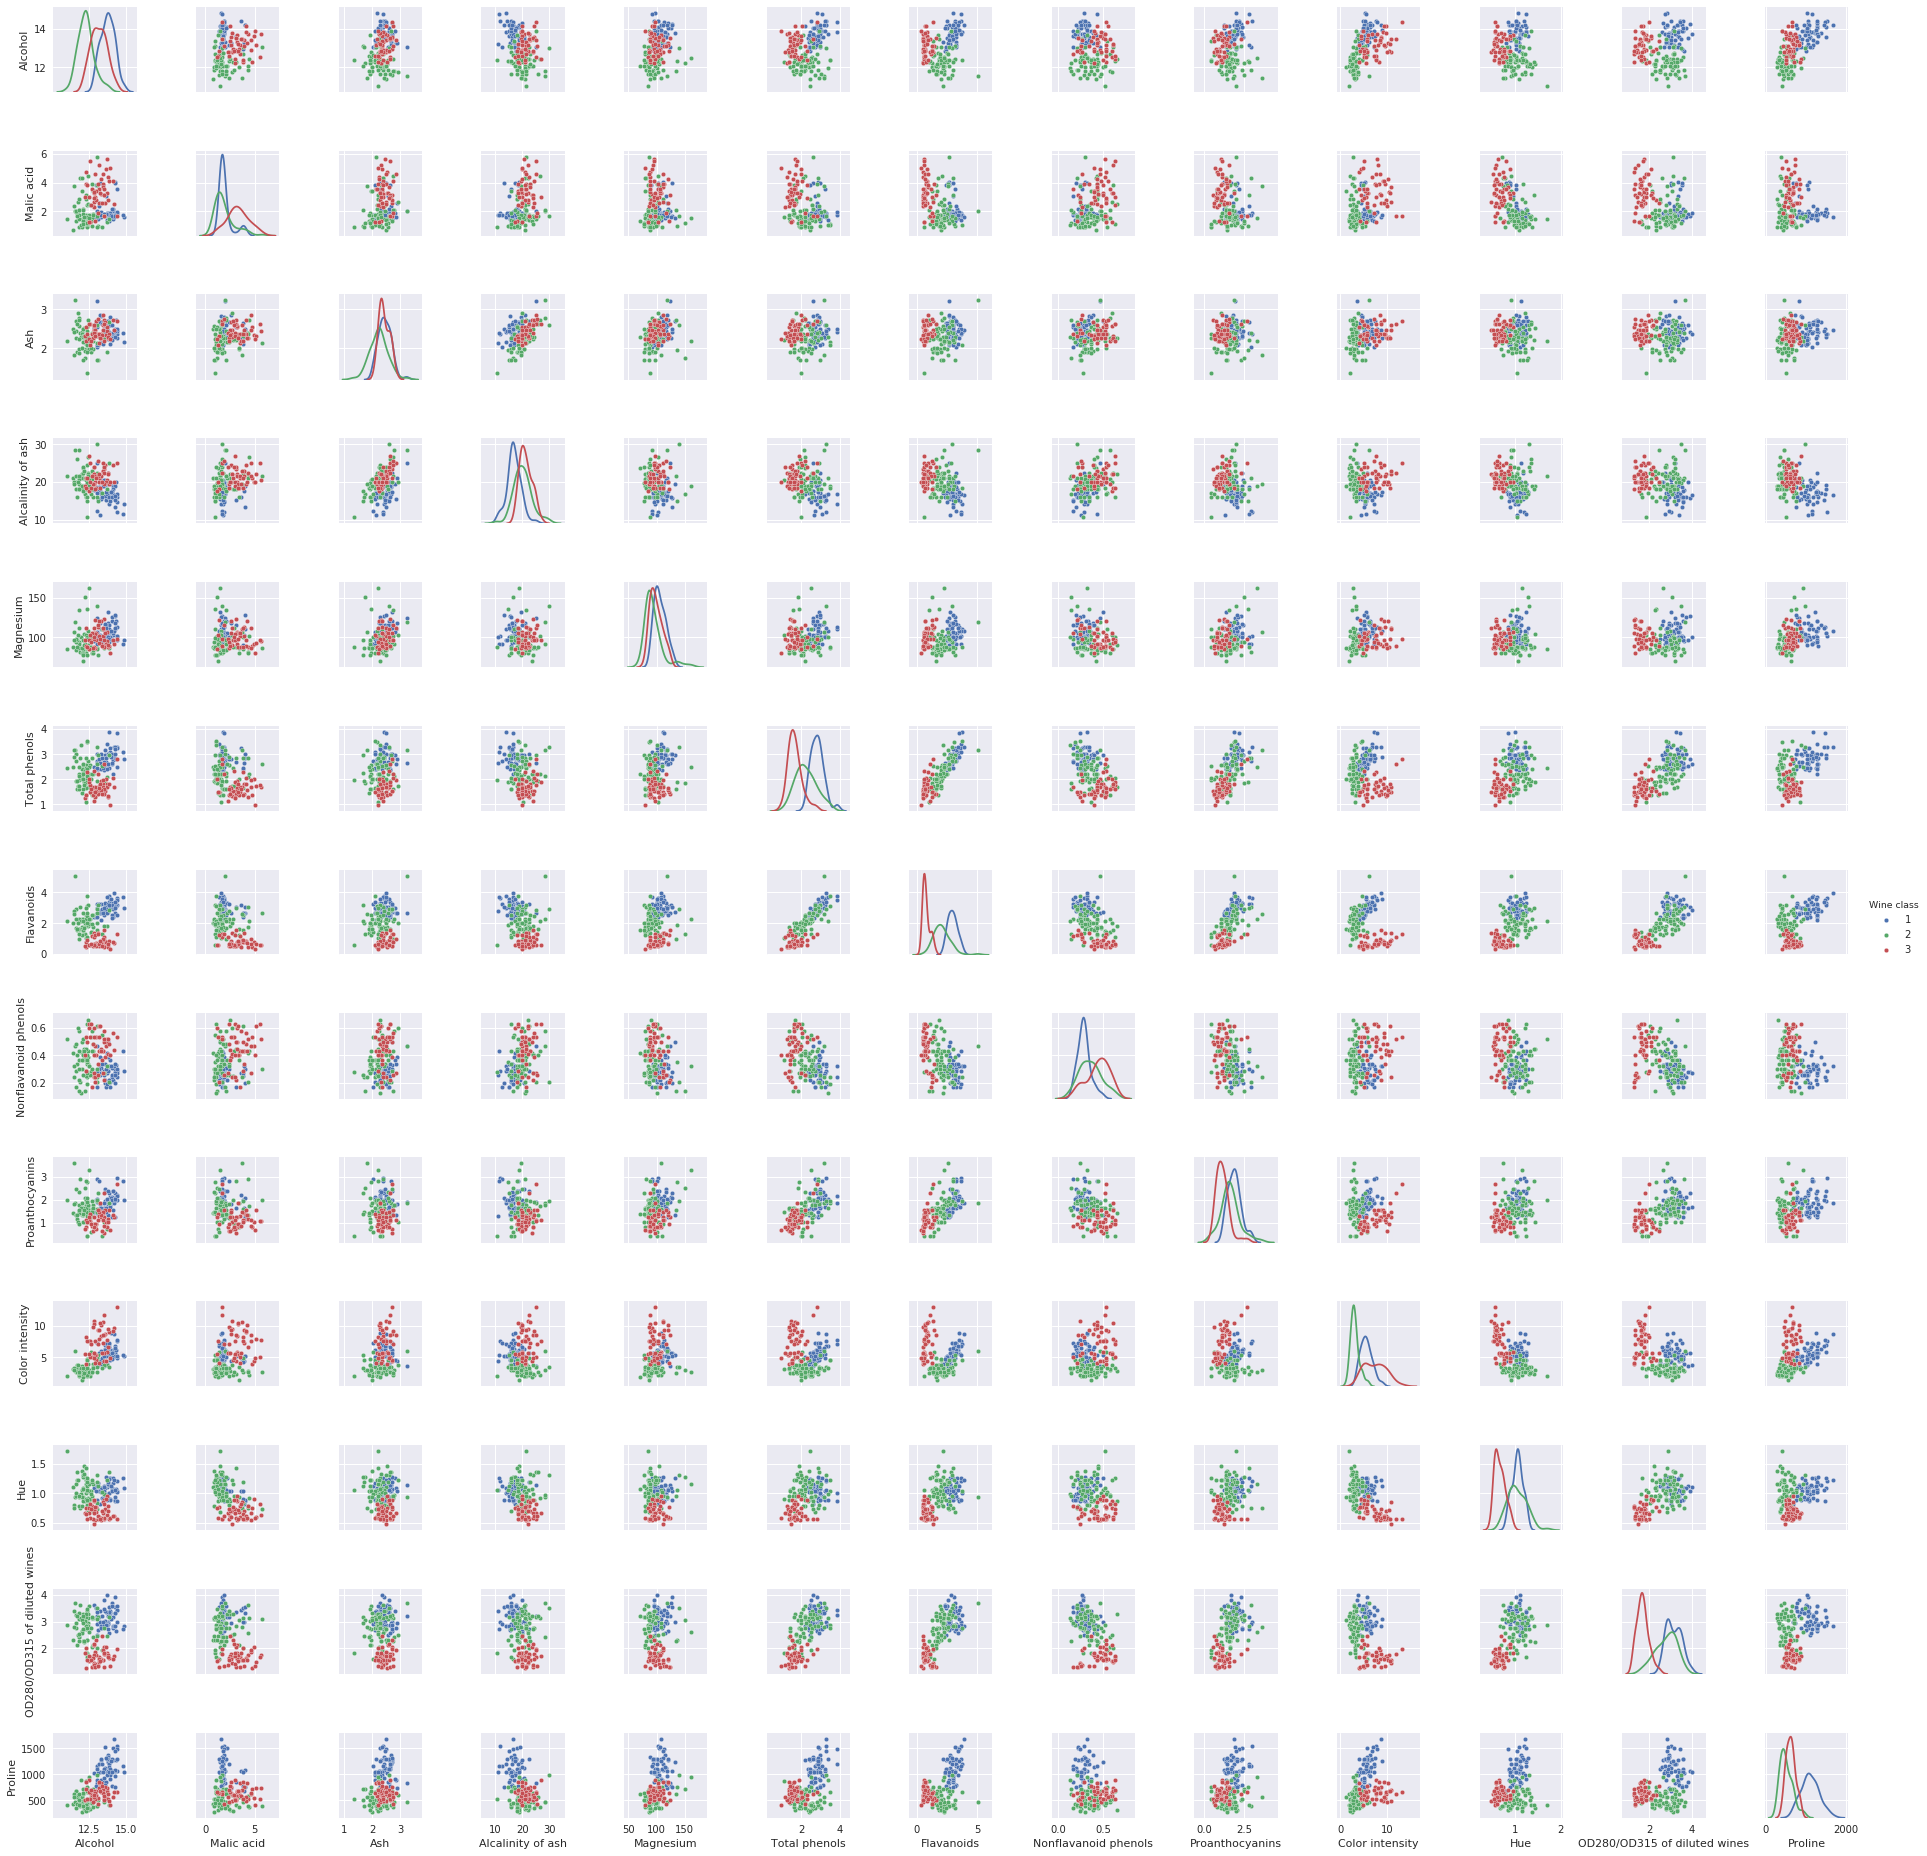

In [18]:
sns.set(font_scale=1)
sns.pairplot(wine_data,
             hue='Wine class',
             vars=wine_header[1:],
             diag_kind='kde',
             size=2,
             plot_kws={'s': 20}
            )
plt.savefig('wine_pairplot.pdf', dpi=600, bbox_inches='tight')

Посчитаем попраные корреляции признаков, исключив метку класса: 

In [19]:
corr_data = wine_data[wine_header[1:]].corr()
corr_data = np.round(corr_data, 2)
corr_data

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
Alcohol,1.00,0.09,0.21,-0.31,0.27,0.29,0.24,-0.16,0.14,0.55,-0.07,0.07,0.64
Malic acid,0.09,1.00,0.16,0.29,-0.05,-0.34,-0.41,0.29,-0.22,0.25,-0.56,-0.37,-0.19
Ash,0.21,0.16,1.00,0.44,0.29,0.13,0.12,0.19,0.01,0.26,-0.07,0.00,0.22
Alcalinity of ash,-0.31,0.29,0.44,1.00,-0.08,-0.32,-0.35,0.36,-0.20,0.02,-0.27,-0.28,-0.44
Magnesium,0.27,-0.05,0.29,-0.08,1.00,0.21,0.20,-0.26,0.24,0.20,0.06,0.07,0.39
Total phenols,0.29,-0.34,0.13,-0.32,0.21,1.00,0.86,-0.45,0.61,-0.06,0.43,0.70,0.50
Flavanoids,0.24,-0.41,0.12,-0.35,0.20,0.86,1.00,-0.54,0.65,-0.17,0.54,0.79,0.49
Nonflavanoid phenols,-0.16,0.29,0.19,0.36,-0.26,-0.45,-0.54,1.00,-0.37,0.14,-0.26,-0.50,-0.31
Proanthocyanins,0.14,-0.22,0.01,-0.20,0.24,0.61,0.65,-0.37,1.00,-0.03,0.30,0.52,0.33
Color intensity,0.55,0.25,0.26,0.02,0.20,-0.06,-0.17,0.14,-0.03,1.00,-0.52,-0.43,0.32


Корреляционная матрица большой размерности с точки зрения изучения ее методом пристального взгляда.
Поэтому подготовим удобный функционал для поиска максимальных и минимальных коэффициентов матрицы.

In [20]:
def get_top_k_correlated(corr_data, k, names, reverse=False, method=np.max):
    m = corr_data.as_matrix().copy()
    np.fill_diagonal(m, 0.0)
    result = []
    for i in range(k):
        a, b = np.where(m == method(m))
        f1, _ = a
        f2, _ = b
        result.append((names[f1] + ' & ' + names[f2], method(m)))
        m[(a, b)] = 0.0
    return pd.DataFrame(pd.Series(dict(result)).sort_values(ascending=reverse),
                        columns=['Pirson coefficient'])

In [21]:
top_4_correlated_plus = get_top_k_correlated(corr_data, 4, wine_header[1:])

In [22]:
top_4_correlated_minus = get_top_k_correlated(corr_data, 4, wine_header[1:], reverse=True, method=np.min)

Из изучения kde признаков и количества пар для конкретного признака, в которых классы можно отделить "зрительно без труда", можно предположить, что наиболее информативными являются признаки (придем 4 основных признака):

- **Alcohol**, kde для каждого класса очень похожи, но смещены относительно друга и хорошо описываются своими средними; в паре с практически любым другим признаком дает картинку, на которой классы хорошо отделимы

- **Proline**, этот признак очень хорошо отделят 1 класс вина (синий цвет), это видно и по kde и по парным зависимостям с другими признаками

- **Color intensity**, kde для каждого из классов имеют различный вид, также признак хорошо отделяет 3 класс вина (красный цвет)

- **Total phenols**, качественно признак ведет себя также как и Alcohol

К неиформативным признакам можно отнести:

- **Magnesium**, kde для каждого класса практически совпадают, поэтому отдельно этот признак является плохим разделителем и для метрических моделей будет вносить одинаковый вклад в расстояние до каждого из классов

- **Ash**, качественно картина такая же как и у признака **Magnesium**

- **Alcolinity of Ash**, ситуация чуть лучше, чем с признаком **Magnesium**

Первые четыре пары наиболее положительно коррелируемых признаков находятся в талице top_4_correlated_plus:

In [23]:
top_4_correlated_plus

,Pirson coefficient
Total phenols & Flavanoids,0.86
Flavanoids & OD280/OD315 of diluted wines,0.79
Total phenols & OD280/OD315 of diluted wines,0.70
Flavanoids & Proanthocyanins,0.65


Первые четыре пары наиболее отрицательно коррелируемых признаков находятся в талице top_4_correlated_minus:

In [24]:
top_4_correlated_minus

,Pirson coefficient
Malic acid & Hue,-0.56
Flavanoids & Nonflavanoid phenols,-0.54
Color intensity & Hue,-0.52
Nonflavanoid phenols & OD280/OD315 of diluted wines,-0.50


Из корреляционных зависимостей можно сделать некоторые инетерсные выводы, например, видно, что интенсивность цвета растет с понижением количества осадков в нем (**Color intensity & Hue=-0.52**). Это означает то, что вино более светлое, если в нем меньше осадков (чем больше значение интенсивности цвета, тем более светлый цвет). Также присутствуют и достаточно очевидные зависимости, например **Total phenols & Flavanoids=0.86**, говорит нам о том, что с ростом общего каличества фенолов, количество фенолов, относящихся к группе фенолов Flavanoids также растет.

### 3. (8 баллов) Знакомство с пакетом Sklearn и алгоритмом kNN

![](http://www.scipy-lectures.org/_images/scikit-learn-logo.png)

В этом задании вам будет предложено продолжить работать с данными Wine dataset. Постарайтесь обойтись без дублирования кода, подготовьте шаблонные функции для построения графиков в заданиях.

** 1. (1 балл)** Преобразуйте данные  к матричному виду *numpy.array*: создайте из *pandas.DataFrame* отдельно матрицу объект-признак и вектор ответов.

In [25]:
data = wine_data[wine_header[1:]].as_matrix()
target = wine_data['Wine class'].as_matrix()
print(data.shape)
print(target.shape)

(178, 13)
(178,)


** 2. (2 балла) ** Обучите классификатор *sklearn.neighbors.KNeighborsClassifier* на данных Wine dataset для различных параметров n_neighbors, используя методику *sklearn.model_selection.GridSearchCV*. Постройте график зависимости метрики accuracy от параметра n_neighbors, а также ее $1\sigma-$доверительный интервал. При каком параметре n_neigbors достигается максимальное значение accuracy? Повторите эксперимент для различных параметров cv: 3, 5, 10. Какие выводы можно сделать?

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [27]:
neighbors_params = {'n_neighbors': list(range(1, 100))}
cv_params = [3, 5, 7, 10, 40]

def get_fitted_searcher(X, y, params, cv):
    clf = KNeighborsClassifier()
    grid_searcher = GridSearchCV(clf, params, cv=cv)
    grid_searcher.fit(X, y)
    return grid_searcher

def get_means_and_stds(grid_searcher):
    means = grid_searcher.cv_results_['mean_test_score']
    stds = grid_searcher.cv_results_['std_test_score']
    return means, stds

def plot_means_stds(means, stds, neighbors, label):
    plt.plot(range(1, 100), means, label=label)
    plt.fill_between(range(len(means)), means + stds, means - stds, alpha = 0.2)
    plt.xlabel('Number of nearest neighbours', fontsize=20)
    plt.ylabel('Accuracy score', fontsize=20)

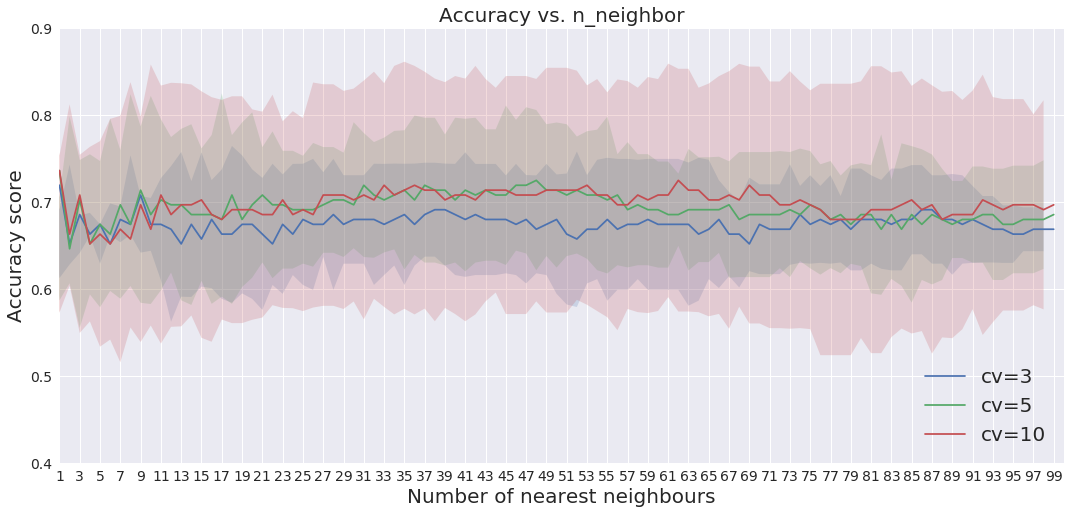

In [28]:
plt.figure(figsize=(18, 8))
for cv in (3, 5, 10):
    searcher = get_fitted_searcher(data, target, neighbors_params, cv)
    means, stds = get_means_and_stds(searcher)
    plot_means_stds(means, stds, neighbors_params['n_neighbors'], label='cv={}'.format(cv))
plt.title('Accuracy vs. n_neighbor', fontsize=20)
plt.legend(loc=4, prop={'size': 20})
plt.yticks(fontsize=14)
plt.ylim(0.4, 0.9)
plt.xlim(1, 100)
plt.xticks(np.arange(1, 100, 2), fontsize=14)
plt.show()

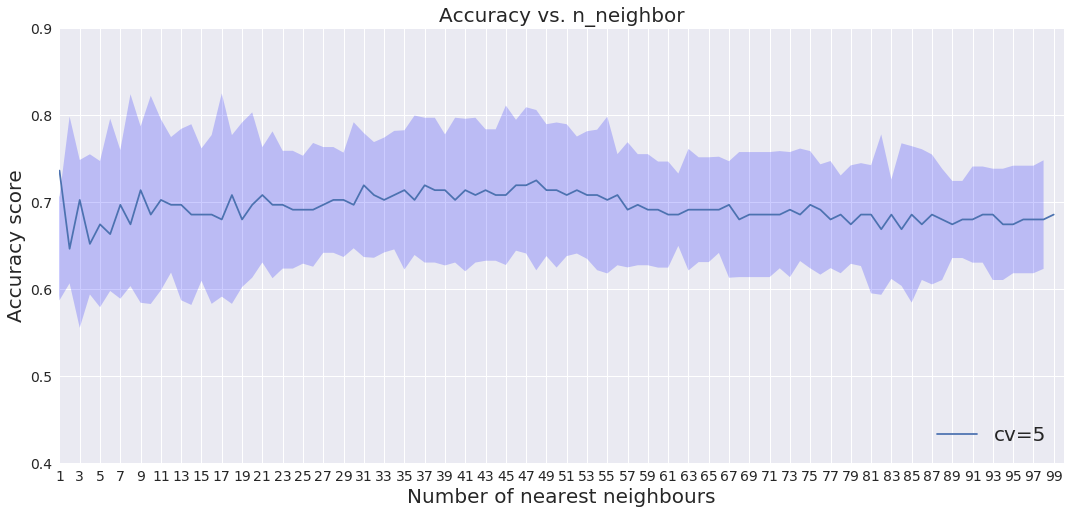

Best accuracy is 0.7359550561797753. Parameter n_neigbours is equal to 1.


In [29]:
cv = 5
plt.figure(figsize=(18, 8))
searcher = get_fitted_searcher(data, target, neighbors_params, cv)
means, stds = get_means_and_stds(searcher)
plt.plot(range(1, 100), means, label='cv={}'.format(cv))
plt.fill_between(range(len(means)), means + stds, means - stds, alpha = 0.2, facecolor='blue')
plt.title('Accuracy vs. n_neighbor', fontsize=20)
plt.xlabel('Number of nearest neighbours', fontsize=20)
plt.ylabel('Accuracy score', fontsize=20)
plt.yticks(fontsize=14)
plt.ylim(0.4, 0.9)
plt.xlim(1, 100)
plt.xticks(np.arange(1, 100, 2), fontsize=14)
plt.legend(loc=4, prop={'size': 20})
plt.show()
print('Best accuracy is {}. Parameter n_neigbours is equal to {}.'.format(means[means.argmax()],
                                                                          list(range(1, 100))[means.argmax()]))

Можно заметить, что с ростом cv, мы лучше оцениваем accuracy, так как обучаем больше классификаторов и получаем более хорошую среднюю оценку, однако дисперсия растет, так как данных для усреднения больше. На 5 фолдах получаем лучший классификатор с параметром n_neigbours=1 и accuracy=0.7359550561797753.

**3. (2 балла) ** Можно ли улучшить accuracy, предварительно преобразовав данные? Трасформируйте данные, используя *sklearn.preprocessing.scale*. Повторите эксперимент из предыдущей задачи для преобразованных данных (можно для единственного параметра cv). Улучшился ли результат? Какие выводы можно сделать?

In [30]:
from sklearn.preprocessing import scale

In [31]:
data_scaled = scale(data)
searcher_scaled = get_fitted_searcher(data_scaled, target, neighbors_params, cv)
means_scaled, stds_scaled = get_means_and_stds(searcher_scaled)

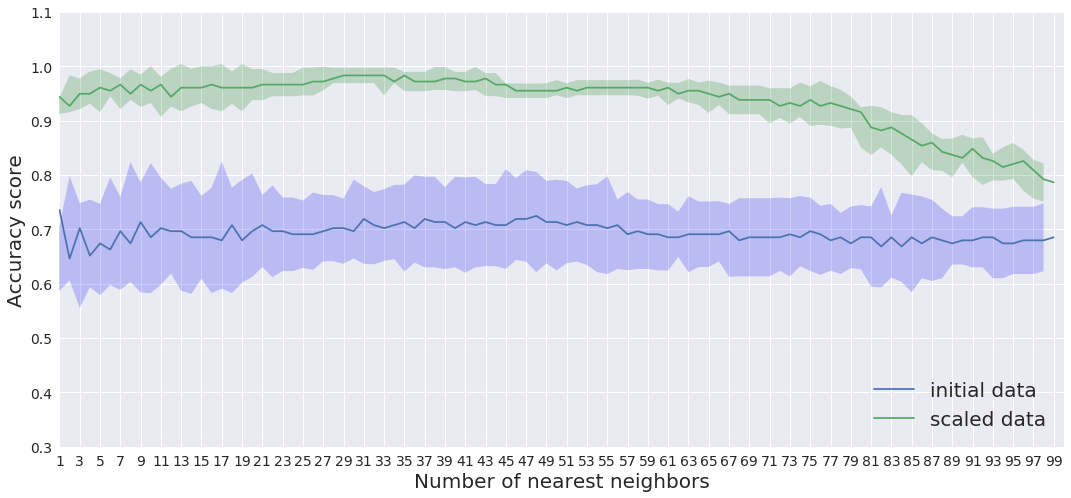

Best accuracy for initial data is 0.7359550561797753. Parameter n_neigbors is equal to 1.
Best accuracy for scaled data is 0.9831460674157303. Parameter n_neigbors is equal to 29.


In [32]:
plt.figure(figsize=(18, 8))
plt.plot(range(1, 100), means, label='initial data')
plt.plot(range(1, 100), means_scaled, label='scaled data')
plt.fill_between(range(len(means_scaled)), means_scaled + stds_scaled,
                 means_scaled - stds_scaled, alpha = 0.2, facecolor='green')
plt.fill_between(range(len(means)), means + stds,
                 means - stds, alpha = 0.2, facecolor='blue')
plt.xlabel('Number of nearest neighbors', fontsize=20)
plt.ylabel('Accuracy score', fontsize=20)
plt.yticks(fontsize=14)
plt.ylim(0.3, 1.1)
plt.xlim(1, 100)
plt.xticks(np.arange(1, 100, 2), fontsize=14)
plt.legend(loc=4, prop={'size': 20})
plt.show()
print('Best accuracy for initial data is {}. ' 
      'Parameter n_neigbors is equal to {}.'.format(means[means.argmax()],
                                                    list(range(1, 100))[means.argmax()]))
print('Best accuracy for scaled data is {}. '
      'Parameter n_neigbors is equal to {}.'.format(means_scaled[means_scaled.argmax()],
                                                    list(range(1, 100))[means_scaled.argmax()]))


После [стандартизации](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler) данных (не путать с [нормализацией](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Normalizer.html#sklearn.preprocessing.Normalizer)) удается получить лучший классификатор с параметром n_neigbours=34 и accuracy=0.9831460674157303. Видим, что для каждого параметра n_neigbours из сетки результат сильно вырос. Связано это с тем, что до масштабирования, многие из информативных признаков изменяющиеся в меньших пределах, чем более неинформативные признаки меньше вносили вклад в суммарное расстояние (метрика Евклида) между объектами. 

**4. (1 балл) ** Постройте confusion matrix, а также найдите значения метрик: recall, precision, f1-score для лучшего классификатора из предыдущей задачи. Посмотрите в сторону модуля *sklearn.metrics*. Какие выводы можно сделать по полученным значениям метрик?

In [33]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [34]:
target_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=29),
                                data_scaled, target, cv=5)

In [35]:
confusion_matrix(target, target_pred)

array([[59,  0,  0],
       [ 2, 68,  1],
       [ 0,  0, 48]])

In [36]:
report = classification_report(target, target_pred)
print(report)

             precision    recall  f1-score   support

          1       0.97      1.00      0.98        59
          2       1.00      0.96      0.98        71
          3       0.98      1.00      0.99        48

avg / total       0.98      0.98      0.98       178



Классификатор дает очень хорошие результаты. Ошибается только на трех объектах второго класса. Связано это с тем, что второй класс (зеленые точки) имеет в данных выбросы в несколько точек, на которых мы и ошибаемся. Еще раз тут посмотрим на выбросы в осях **Nonflavanoid phenols vs. Magnesium** :

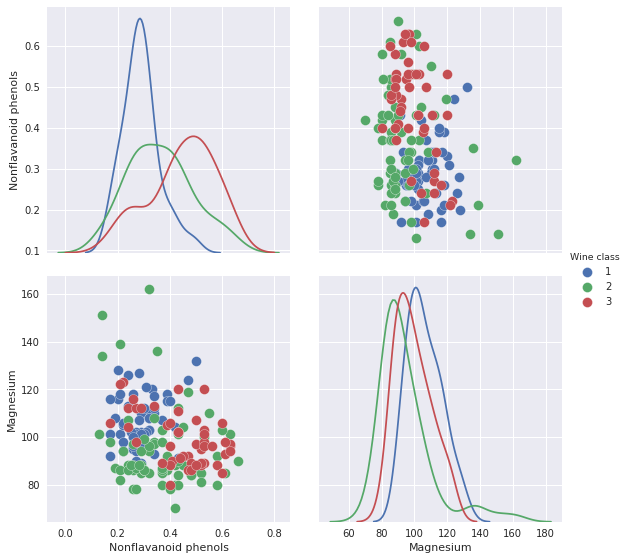

In [37]:
sns.set(font_scale=1)
sns.pairplot(wine_data,
             hue='Wine class',
             vars=['Nonflavanoid phenols', 'Magnesium'],
             diag_kind='kde',
             size=4,
             plot_kws={'s': 100}
            )
plt.show()

Например, на правом верхнем графике видим, что 5 зеленых точек лежат отдельно от основных представителей класса. Причем выбросы отделены от основных представителей класса представителями дургих классов и такие выбросы для различных параметров n_neighbor имеют большее количество ближайших соседей, представленными объектами других классов. Такая картина свойственна для 2-го класса не только в приведенных осях, но и для других пар признаков.  

**5. (2 балла) ** В задаче 2.4 вы должны были высказать гипотезу о важности/информативности признаков. Удалите на ваш взгляд самые неинформативные признаки, проведите эксперимент предыдущей задачи. Удалите на ваш взгляд самые важные признаки, проведите эксперимент предыдущей задачи. Подтвердились ли вашы гипотезы, сделанные в задаче 2.4?

Воспользуемся следующей идеей, будем последовательно с возвращением исключать каждый из признаков и искать по сетке параметра n_neighbor лучший классификатор для оставшихся 12-ти признаков:

In [38]:
df = {}

for feature in wine_header:
    data_wine1 = wine_data[list(set(wine_header) - set([feature]))]
    data1 = data_wine1[list(set(data_wine1.columns) - set(['Wine class']))].as_matrix()
    data1_scaled = scale(data1)
    grid = get_fitted_searcher(data1_scaled, target, neighbors_params, cv=5)
    df[feature] = [grid.best_score_, grid.best_params_['n_neighbors']]

In [39]:
df['13 features'] = df.pop('Wine class')
df = pd.DataFrame.from_dict(df, orient='index')
df = df.rename(columns={0: 'Accuracy', 1: 'n_neighbors'})
np.round(df.sort_values('Accuracy'), 4)

,Accuracy,n_neighbors
Alcohol,0.9382,19
Proline,0.9494,7
Color intensity,0.9607,15
Ash,0.9663,5
Alcalinity of ash,0.9663,7
OD280/OD315 of diluted wines,0.9663,30
Flavanoids,0.9719,28
Malic acid,0.9775,61
Magnesium,0.9831,25
Total phenols,0.9831,23


Из таблицы выше (index таблицы имеет название того признака, который мы исключили из рассмотрения) видно, что первые три информативных признаков при таком подходе отбора признаков: **Alcohol**, **Proline**, **Color intensity**. А исключение с возвращением признаков **Hue**, **Proanthocyanins**, **Nonflavanoid phenols**, **Total phenols**, **Magnesium** совершенно не дает ухудшения метрики качества accuracy. Напомню, что такого подхода в этом задании хватало для получения полного балла.

В ощем случае, хотелось бы найти минимальный набор признаков (feature selection), который для данного метода классификации дает наилучший результат с точки зрения заранее зафиксированной метрики качества (в нашем случае это acuuracy, то есть модель классификации допускает наименьшее количество неверно классифицируемых объектов). Самая простая методика, это полный перебор всех возможных подмножеств комбинаций признаков. Таких подмножеств $2^n$, где $n$ $-$ размерность признакового пространства (так называемый ). В нашем случае количество таких подмножеств равно: 

In [40]:
2 ** 13

8192

Ячейка представленная ниже реализует методику полного перебода признаков для модели классификации ближайших соседей и записывает результат в датафрейм accuracy.param.combinations.csv. Общее время работы ячейки на моем ноутбуке заняло более 6 часов! **Лучше не запускать эту ячейку, а воспользоваться сохраненными данными!**

In [ ]:
clf = KNeighborsClassifier()
params = []
n_neighbors = {'n_neighbors': list(range(1, 100))}
for i in range(1, 14):
    for comb in combinations(range(13), i):
        grid = GridSearchCV(clf, param_grid=n_neighbors, cv=5)
        grid.fit(data_scaled[:, comb], target)
        params.append((comb, grid.best_score_, grid.best_params_['n_neighbors']))
        print(len(params), (len(comb), grid.best_score_, grid.best_params_['n_neighbors']))
params_dict = {'BestAccuracy': [], 'FeaturesCombination': [], 'BestParam': []}
for param in params:
    params_dict['FeaturesCombination'].append(param[0])
    params_dict['BestAccuracy'].append(param[1])
    params_dict['BestParam'].append(param[2])
df = pd.DataFrame(data=params_dict)
df.to_csv('accuracy.param.combinations.csv', index=False)
df.head()

In [41]:
from ast import literal_eval as make_tuple
dff = pd.read_csv('accuracy.param.combinations.csv')
dff['FeaturesCombination'] = pd.Series(map(make_tuple, dff['FeaturesCombination']))
dff.sort_values(by=['BestAccuracy'])[-5:]

,BestAccuracy,BestParam,FeaturesCombination
4682,0.994382,11,"(0, 2, 3, 9, 10, 11, 12)"
8132,0.994382,26,"(0, 1, 2, 3, 5, 6, 8, 9, 10, 11, 12)"
5936,0.994382,23,"(0, 1, 2, 3, 9, 10, 11, 12)"
6389,1.000000,39,"(0, 2, 3, 6, 8, 9, 10, 12)"
7510,1.000000,59,"(0, 2, 3, 6, 8, 9, 10, 11, 12)"


In [42]:
best_accuracy = {i: [] for i in range(1, 14)}
best_param = {i: [] for i in range(1, 14)}
for i in dff.values:
    best_accuracy[len(i[2])].append(i[0])
    best_param[len(i[2])].append(i[1])

Так как такой полный перебор тратит очень много процессорного времени, то на практике уже начиная с размерности признакового пространства равной 20 этот алгоритм не применяется (сложность алгоритма растет экспоненциально, так называемый эффект "комбинаторного взрыва"). Поэтому на практике применяют другие переборные алгоритмы, вводящие различные эвристики для сокращения полного перебора. К таким алгоритмам относят жадные алгоритмы Add и Del, имеющие квадратичную сложность относительно количества признаков. А также более сложный композиционный алгоритм Add-Dell. Об этих алгоритмах и других алгоритмах отбора признаков можно почитать по ссылкам: [короткое видео](https://www.coursera.org/learn/unsupervised-learning/lecture/yzxmI/zhadnyie-mietody-otbora-priznakov), [слайды Воронцова](http://www.machinelearning.ru/wiki/images/archive/4/4f/20111004204412%21Voron-ML-Modeling-slides.pdf). Ниже приведен пример простейшей реализации алгоритма Add на данном датасете для модели ближайщих соседей:    

In [43]:
feature_stat = []
feature_comb = []
best_score1 = 0
best_param1 = 0
best_comb1 = 0
for k in range(13):
    for i in range(13):
        if i not in feature_comb:
            f = np.append(feature_comb, i)
            grid = get_fitted_searcher(data_scaled[:, list(map(int, f))], target, neighbors_params, cv)
            if grid.best_score_ >= best_score1:
                best_score1 = grid.best_score_
                best_param1 = grid.best_params_
                best_comb1 = tuple(map(int, f))
    
    feature_comb = list(best_comb1)
    feature_stat.append((best_comb1, best_score1, best_param1['n_neighbors']))
    best_score1 = 0
add_param = []
add_accuracy = []
subset_size = []
for i in feature_stat:
    add_param.append(i[2])
    add_accuracy.append(i[1])
    subset_size.append(len(i[0]))

Для наглядности визуализируем результаты, проведенных экспериментов:

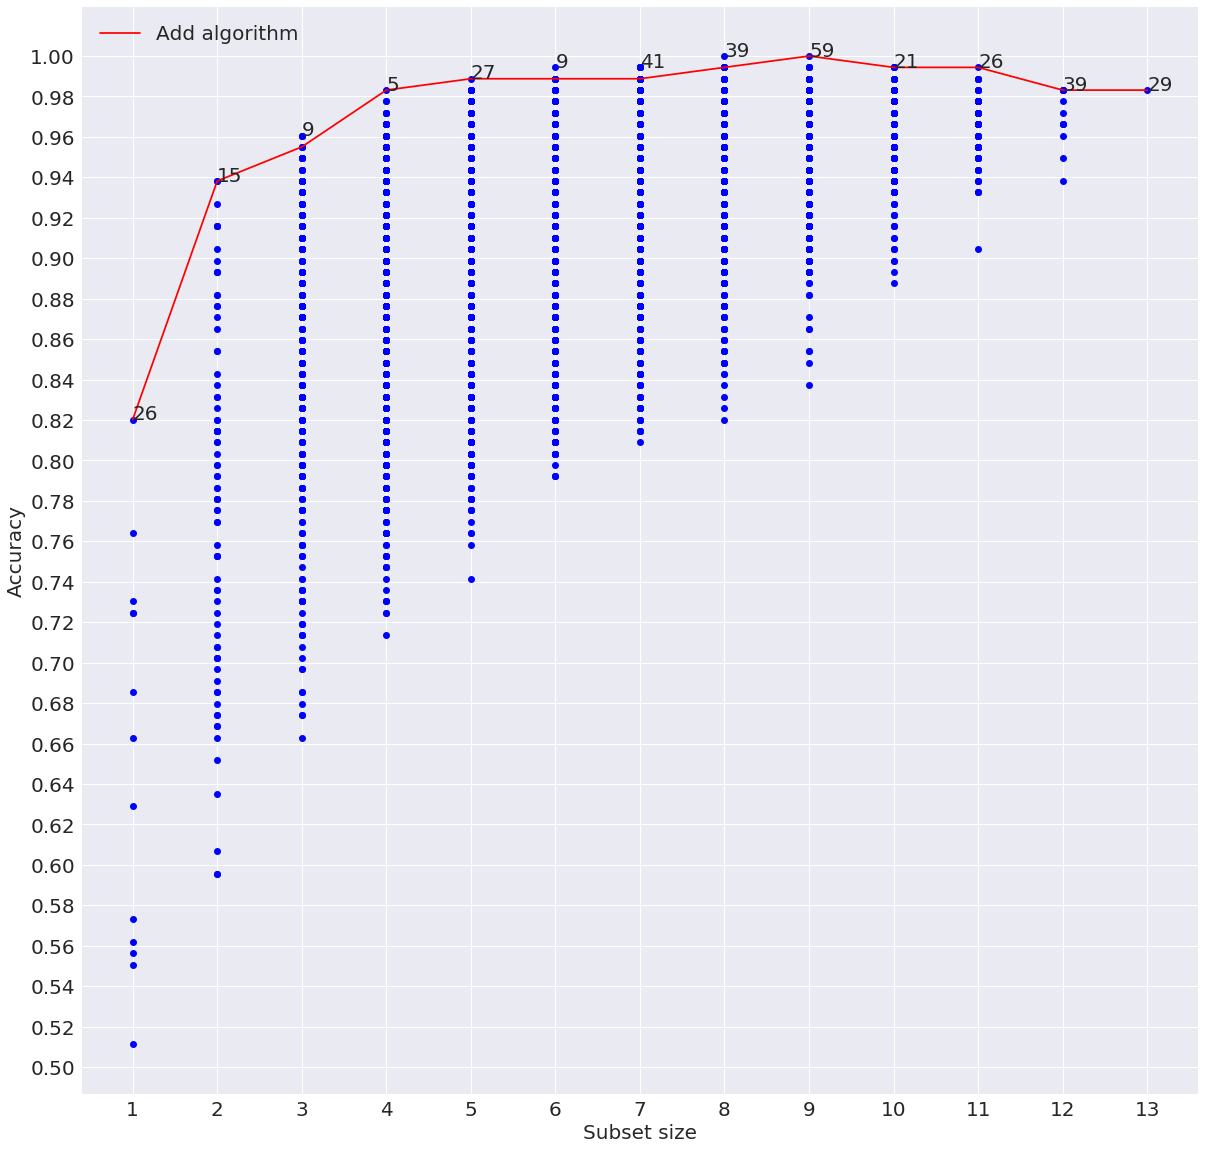

In [44]:
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111)
for key, val in best_accuracy.items():
    subsets_size = np.ones(len(val)) * key
    plt.plot(subsets_size, val, 'o', color='blue')
    idx_max = np.asarray(val).argmax()
    ax.annotate(best_param[key][idx_max], xy=(key, val[idx_max]), size=20)
plt.plot(subset_size, add_accuracy, color='red', label='Add algorithm')
plt.legend(loc=2, fontsize=20)
plt.xlabel('Subset size', fontsize=20), plt.ylabel('Accuracy', fontsize=20)
plt.xticks(range(1, 14), fontsize=20), plt.yticks(np.arange(0.5, 1.02, 0.02), fontsize=20)
plt.grid(True)
plt.show()

В библиотеке sklearn из переборных алгоритмов реализован только один алгоритм (вариация алгоритма Del) sklearn.feature_selection.RFE. В модуле sklearn.feature_selection есть и другие модели отбора признаков (отличные от переборных) по информативности, некоторые из них мы будем изучать на протяжении курса. Кратки обзор модуля можно найти по [ссылке](http://datareview.info/article/otbor-priznakov-dlya-mashinnogo-obucheniya-na-python/).

### 4. (10 баллов) Бонусное задание

![](https://i.ytimg.com/vi/FZW-lIorb-8/hqdefault.jpg)

P.S. Leon мне ничего не платит:(

**1. (3 + 2 баллов)** Известно, что метод ближайших соседей неустойчив к шуму. Рассмотрим модельную задачу бинарной классификации с одним признаком и двумя объектами обучающей выборки: $x_1 = 0.1$, $x_2 = 0.5$. Первый объект относится к первому классу, второй - ко второму. Добавим к объектам новый шумовой признак, распределенный равномерно на отрезке $[0, 1]$. Теперь каждый объект описывается уже двумя признаками. Пусть требуется классифицировать новый объект $u=(0,0)$ в этом пространстве методом одного ближайшего соседа (метрика Евклида). Какова вероятность того, что после добавления шума второй объект окажется к нему ближе, чем первый? *Примечание:* задание можно решить теоретически (3 балла), а можно при помощи моделирования [методом Монте-Карло](https://pythonprogramming.net/monte-carlo-simulator-python/) и средствами [numpy.random](https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.random.html) (2 балла).

Определение вероятности методом Монте-Карло:

In [45]:
from sklearn.neighbors import DistanceMetric
dist = DistanceMetric.get_metric('euclidean')

num_exp = 100000
num_true_exp = 0
for i in range(num_exp):
    f1 =  np.random.uniform(0, 1)
    f1 = np.append([0.5], f1)
    f2 =  np.random.uniform(0, 1)
    f2 = np.append([0.1], f2)
    if (dist.pairwise([[0, 0]], [f1]) <  dist.pairwise([[0, 0]], [f2])).all():
        num_true_exp += 1
print(num_true_exp / num_exp)

0.27527


Или векторизированная версия, которая работает быстрее:

In [46]:
def get_random_features(x, num):
    f = np.random.uniform(0, 1, num).reshape((num, 1))
    return np.hstack([np.ones((num, 1)) * x, f])

def distance(x):
    return DistanceMetric.get_metric('euclidean').pairwise(x, np.zeros((1, 2)))
    
d = distance(get_random_features(0.5, num_exp)) < distance(get_random_features(0.1, num_exp))

len(np.where(d == True)[0]) / num_exp

0.27547

In [47]:
1 / np.sqrt(num_exp)

0.003162277660168379

Искомая вероятность равна $0.27459$ и определена с точностью до $O\left(1\!/\sqrt{N}\right)$, где $N$ $-$ количество экспериментов. Для проведенных экспериментов погрешность равна $0.003$. Другими словами вероятность ошибочной классификации равна $0.275\pm0.003$.

**2. (5 баллов)** В алгоритме классификации kNN могут использоваться разные алгоритмы поиска ближайших соседей, различимых с точки зрения вычислительной эффективности. Приведите наиболее известные алгоритмы поиска k ближайших точек в пространстве, выпишите асимптотическую сложность в bigO-нотации для обучения классификатора и для предсказания одного объекта (как для затрат по памяти, так и для машинного времени). Параметры обозначьте как k - количество соседей, n - размерность пространства, M - количество объектов в обучающей выборке. Какие из алгоритмов реализованы в *sklearn.neighbors.KNeighborsClassifier*, какие параметры конструктора за это отвечают?